In [3]:
import pandas as pd

In [4]:
path = 'C:/Users/student/Downloads/NH_ML/datasets/housing.csv'

In [62]:
df = pd.read_csv(path)

In [63]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [64]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [65]:
df.values

array([[-122.23, 37.88, 41.0, ..., 8.3252, 452600.0, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 8.3014, 358500.0, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 7.2574, 352100.0, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 1.7, 92300.0, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 1.8672, 84700.0, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 2.3886, 89400.0, 'INLAND']],
      dtype=object)

In [66]:
df.shape

(20640, 10)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
housing = df

In [69]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [70]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
3.8750     41
3.0000     38
3.3750     38
3.6250     37
4.0000     37
4.3750     35
2.1250     33
2.3750     32
4.6250     31
3.5000     30
3.2500     29
3.7500     29
4.8750     29
1.6250     29
2.2500     29
4.2500     28
2.5000     28
3.6875     26
2.7500     25
4.5000     24
2.5625     21
1.8750     21
5.0000     20
3.0625     19
4.4375     18
           ..
5.7780      1
1.3672      1
4.6420      1
2.5389      1
6.2113      1
2.1975      1
6.0591      1
2.1403      1
1.5161      1
4.0037      1
1.9306      1
4.0517      1
3.5082      1
5.2649      1
6.7744      1
4.0677      1
2.1216      1
4.1449      1
6.0808      1
5.6263      1
4.8283      1
2.5599      1
7.3031      1
2.7209      1
2.1630      1
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [71]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018F12B00>,
      dtype=object)

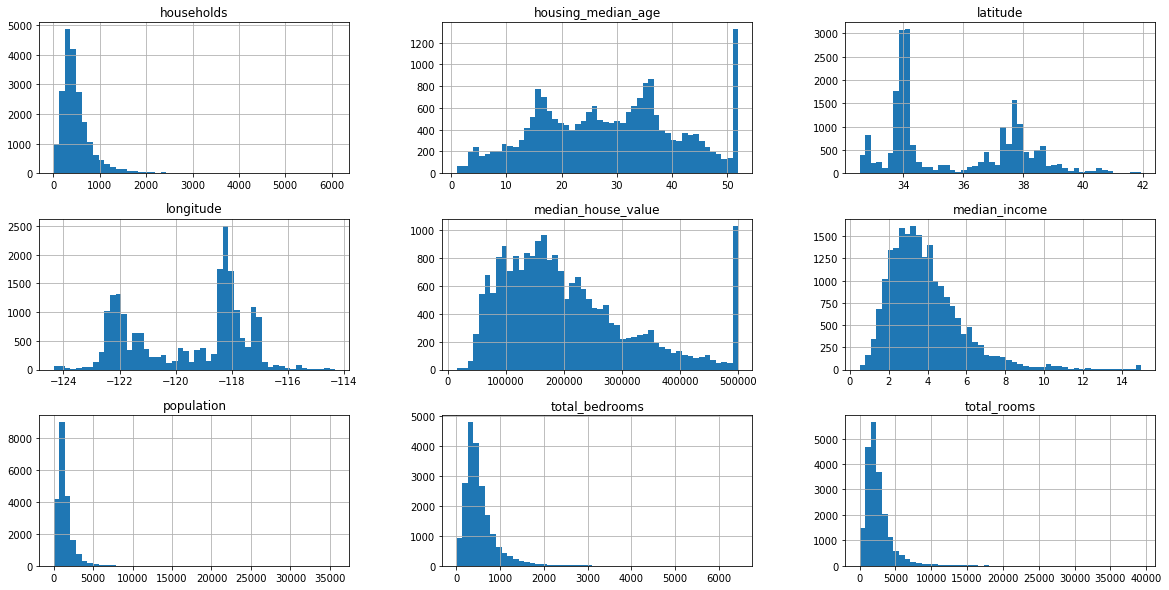

In [72]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 10))

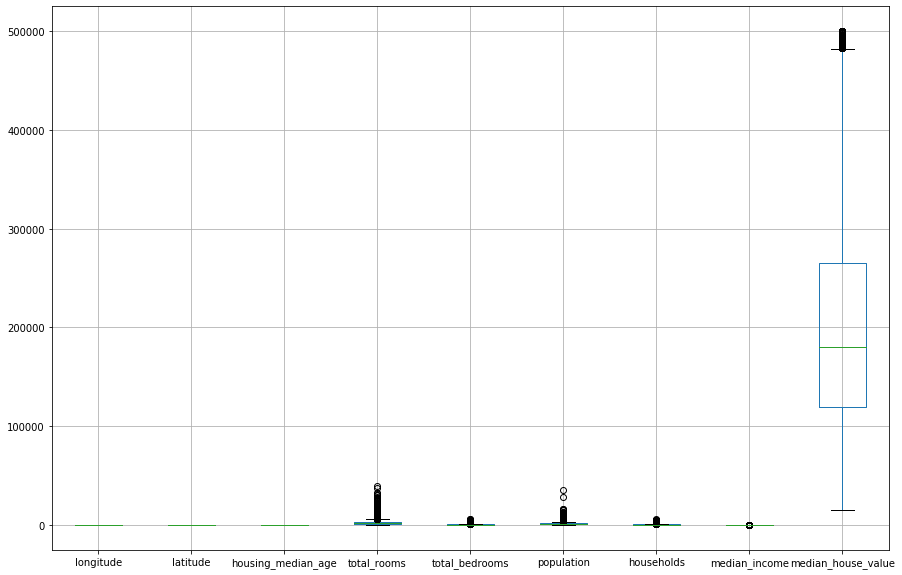

In [73]:
housing.boxplot(figsize=(15, 10))

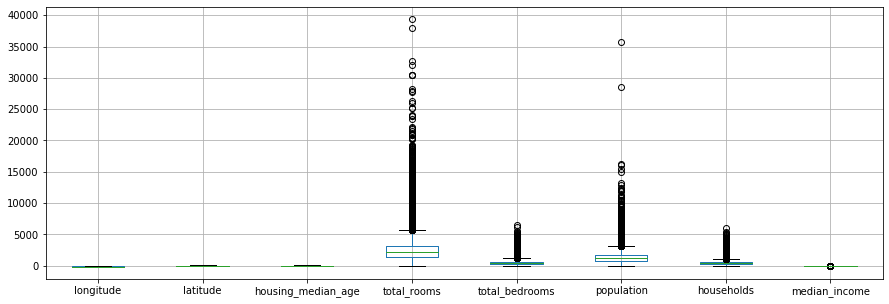

In [74]:
housing.drop(columns='median_house_value').boxplot(figsize=(15,5))

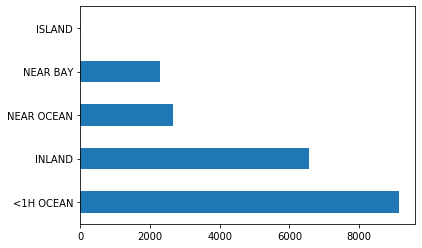

In [75]:
housing['ocean_proximity'].value_counts().plot.barh()

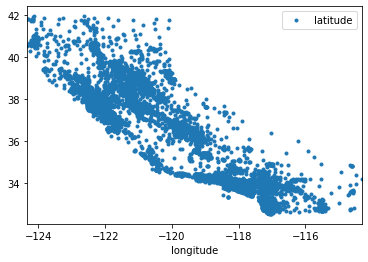

In [76]:
housing.plot(x='longitude', y='latitude', style='.')

In [77]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [78]:
housing = housing.dropna()

In [79]:
y = housing['median_house_value']
x = housing.iloc[:, :-2]
x.shape, y.shape

((20433, 8), (20433,))

In [80]:
# m은 데이터 갯수, n은 특징 갯수
# 학습용 80%, 테스트용 20%
m_train = len(x) *0.8
m_train = int(m_train)

In [81]:
x_train = x.iloc[:m_train]
y_train = y.iloc[:m_train]
x_test = x.iloc[m_train:]
y_test = y.iloc[m_train:]

In [82]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


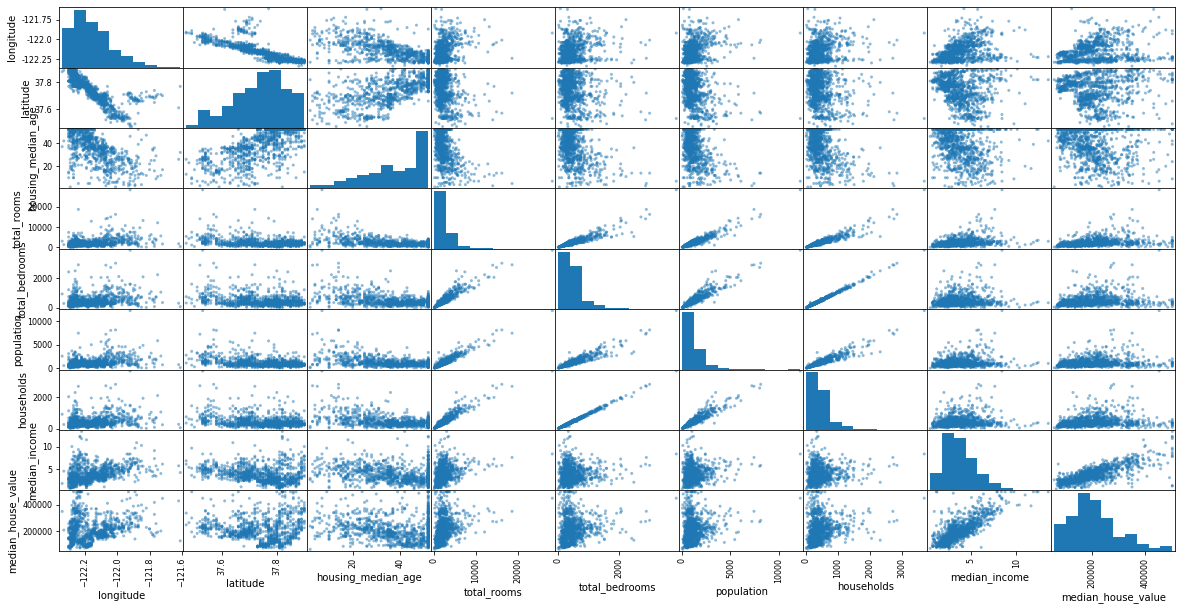

In [83]:
p = pd.plotting.scatter_matrix(housing.iloc[:1000], figsize=(20, 10))

In [84]:
housing.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
model.score(x_train, y_train)

0.6179115278983921

In [89]:
model.score(x_test, y_test)

0.6919099384697789

In [90]:
import matplotlib.pyplot as plt

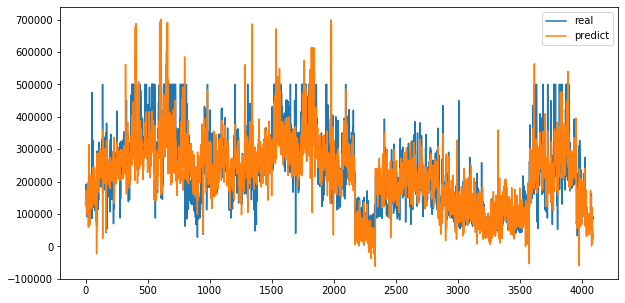

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label = 'real')
plt.plot(model.predict(x_test.values), label = 'predict')
plt.legend()

In [101]:
y_test

16505    134600.0
16506    125900.0
16507    182700.0
16508    149000.0
16509    192100.0
16510    139000.0
16511    182400.0
16512    165600.0
16513    126100.0
16514     94400.0
16515     91900.0
16516    124300.0
16517     94200.0
16518    120800.0
16519    101800.0
16520     96900.0
16521     99200.0
16522    172100.0
16523    135300.0
16524    130800.0
16525    101500.0
16526    101800.0
16527    163900.0
16528    111800.0
16529    197600.0
16530    161400.0
16531    212500.0
16532    175000.0
16533    112500.0
16534    106300.0
           ...   
20610     45500.0
20611     47000.0
20612     48300.0
20613     53400.0
20614     58000.0
20615     57500.0
20616     55100.0
20617     70800.0
20618     63400.0
20619     99100.0
20620    100000.0
20621     77500.0
20622     67000.0
20623     65500.0
20624     87200.0
20625     72000.0
20626     93800.0
20627    162500.0
20628     92400.0
20629    108300.0
20630    112000.0
20631    107200.0
20632    115600.0
20633     98300.0
20634    1

In [102]:
y_test.values

array([134600., 125900., 182700., ...,  92300.,  84700.,  89400.])

In [104]:
y_test.count()

4087